In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from kmodes.kmodes import KModes

In [3]:
df = pd.read_csv('Data - Kualifikasi.csv', delimiter = ";", decimal = ",")
df.fillna("Others", inplace=True)
df2=df.drop(columns=['Nama', 'Gender','Alamat','Tinggal_Dengan',"Tgl_Daftar_Kuliah"])
dfMatrix = df2.to_numpy()
dfMatrix

Categorical columns           : ['Status_Kerja', 'Biaya', 'UKM', 'Organisasi_Kampus', 'Fakultas']
Categorical columns position  : [0, 1, 2, 3, 5]


array([['Belum', 'Beasiswa', 'UKM_3', 'Ya', 3.5, 'DKV'],
       ['Belum', 'Others', 'UKM_2', 'Tidak', 4.0, 'FIKOM'],
       ['Bekerja', 'Beasiswa', 'UKM_4', 'Tidak', 4.5, 'FIKOM'],
       ...,
       ['Bekerja', 'Beasiswa', 'UKM_2', 'Ya', 5.0, 'FT'],
       ['Bekerja', 'Others', 'UKM_4', 'Tidak', 4.5, 'DKV'],
       ['Belum', 'Others', 'UKM_2', 'Ya', 4.5, 'FIKOM']], dtype=object)

In [9]:
# Choose optimal K using Elbow method
cost = []
for cluster in range(1, 10):
    kmode = KModes(n_clusters=cluster, init = "huang", n_init = 10, verbose=1, n_jobs=-1)
    kmode.fit_predict(dfMatrix)
    cost.append(kmode.cost_)
# Converting the results into a dataframe and plotting them
df_cost = pd.DataFrame({'Cluster':range(1, 10), 'Cost_KModes':cost})

Best run was number 1
Best run was number 6
Best run was number 2
Best run was number 3
Best run was number 4
Best run was number 2
Best run was number 5
Best run was number 3
Best run was number 4


In [24]:
kprototype_cost = [36360.864799, 24647.300941, 21799.828391, 20106.629689, 18821.887521, 
                   17873.017229, 17314.548304, 16810.541464, 16224.750865]
df_cost.rename(columns = {"Cost" : "Cost_KModes"}, inplace = True)
df_cost["Cost_KPrototype"] = kprototype_cost
df_cost

,Cluster,Cost_KModes,Cost_KPrototype
0,1,47334.0,36360.864799
1,2,38582.0,24647.300941
2,3,35616.0,21799.828391
3,4,33920.0,20106.629689
4,5,32347.0,18821.887521
5,6,31073.0,17873.017229
6,7,29833.0,17314.548304
7,8,29052.0,16810.541464
8,9,28169.0,16224.750865


Text(0.5, 0, 'Banyaknya Cluster')

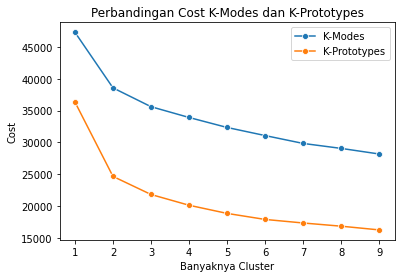

In [36]:
df_melted = df_cost.melt(id_vars = "Cluster")
sns.lineplot(data = df_melted, x = "Cluster", y = "value", hue = "variable", marker = "o")
plt.legend(title = "", labels = ["K-Modes", "K-Prototypes"])
plt.title("Perbandingan Cost K-Modes dan K-Prototypes", fontsize = "large", fontweight = "medium")
plt.ylabel("Cost")
plt.xlabel("Banyaknya Cluster")

In [37]:
kmode = KModes(n_clusters=3, init = "huang", n_init = 10, verbose=1, n_jobs=-1)
kmode.fit_predict(dfMatrix)

Best run was number 4


AttributeError: 'KModes' object has no attribute 'centroids_'

In [38]:
kmode.cluster_centroids_

array([['Belum', 'Others', 'UKM_1', 'Ya', '5.5', 'DKV'],
       ['Belum', 'Beasiswa', 'UKM_4', 'Ya', '4.5', 'FIKOM'],
       ['Bekerja', 'Orang Tua', 'Tidak', 'Tidak', '4.5', 'FT']],
      dtype='<U32')